# Importing the Libraries and reading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

# Assign the depedent and features variables, and split them

In [3]:
x = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values
y = y.reshape(len(y), 1)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)


# Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train = pd.DataFrame(x_train, columns=["Age", "Expected_salary"])

Support Vectore Machine Algorithm

In [6]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", random_state=0)
svm.fit(x_train, y_train.ravel())

SVC(random_state=0)

In [7]:
y_pred_svm = svm.predict(x_test)
y_pred_svm = y_pred_svm.reshape(len(y_pred_svm), 1)
np.concatenate((y_pred_svm, y_test), axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0,

# SVM Metrics

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)

[[64  4]
 [ 3 29]]


In [10]:
accuracy_score(y_test, y_pred_svm)

0.93

# Data Visualization

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


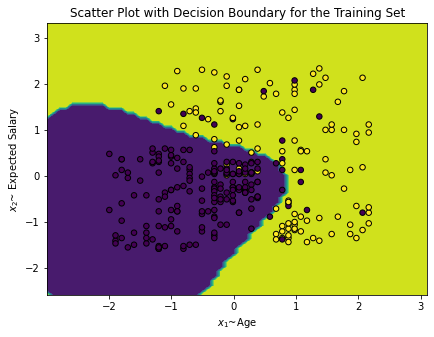

In [11]:

# plotting the decision boundary in the scatter plot of Training and Test Set with labels indicated by colors
x_min, x_max = x_train.Age.min() - 1, x_train.Age.max() + 1
y_min, y_max = x_train.Expected_salary.min() - 1, x_train.Expected_salary.max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = svm.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)





plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(x_train.Age, x_train.Expected_salary, c = y_train, s = 30, edgecolor = 'k')
plt.xlabel('$x_1$~Age')
plt.ylabel('$x_2$~ Expected Salary')
plt.title('Scatter Plot with Decision Boundary for the Training Set')

plt.show()